<a href="https://colab.research.google.com/github/Mitali2303/Probability-Projects-/blob/main/Lab7_23110206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Mitali Ashok Agrawal**

**Roll No.: 23110206**



Q1.  Write a Python program to determine if a given Joint PMF corresponds to independent random variables (X,Y) or not. Take the range of values of random variables X and Y as the input and then take the Joint PMF as the input. Assume X and Y take finite number of values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a matrix of random values for Joint pmf
def mat_joint_pmf(Jp,x_size,y_size):
  random_mat = np.zeros((x_size, y_size))
  s=0
  for i in range(len_x):
    for j in range(len_y):
      random_mat[i,j]=Jp[s]
      s+=1
  joint_pmf = random_mat/ np.sum(random_mat)
  return joint_pmf

# creating the joint PMF table (Just for visualising the table)
def joint_pmf_table(joint_pmf, x_values, y_values):
    print("    ", end="")
    for y in y_values:
        print(f"{y:>10}", end="")
    print()
    for i, row in enumerate(joint_pmf):
        print(f"{x_values[i]:<4}", end="")
        for prob in row:
            print(f"{prob:>10.4f}", end="")
        print()

# checking if the joint pmf is independent or not
def is_independent(x_values, y_values, joint_pmf):
    x_size, y_size = joint_pmf.shape
    for i in range(len_x):
        for j in range(len_y):
            if abs(joint_pmf[i, j] - (x_values[i] * y_values[j]))!=0:
                return False
    return True


x_values = list(map(float,input("Enter the x values: ").split()))
len_x=len(x_values)
y_values = list(map(float,input("Enter the y values: ").split()))
len_y=len(y_values)

Jp=  list(map(int,input("Enter the values of joint pmf: ").split()))
Jp=mat_joint_pmf(Jp,len_x,len_y)
joint_pmf_table(Jp, x_values, y_values)

print(is_independent(x_values, y_values, Jp))

p_x=[0]*len_x
p_y=[0]*len_y
for i in range(len_x):
  for j in range(len_y):
    p_x[i]+=Jp[i,j]

for i in range(len_y):
  for j in range(len_x):
    p_y[i]+=Jp[j,i]





Enter the x values: 0.5 0.5
Enter the y values: 0.5 0.5
Enter the values of joint pmf: 1 1 1 1
           0.5       0.5
0.5     0.2500    0.2500
0.5     0.2500    0.2500
True


Q2. Plot the Joint PMF and the corresponding Joint CDF. Also, determine and plot the two Marginal PMFs and Marginal CDFs.


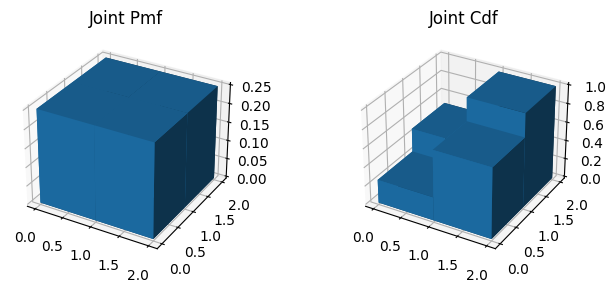

In [ ]:
# 3D Discrete Plot for plotting PMFs
# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


x, y = np.meshgrid(range(Jp.shape[0]), range(Jp.shape[1]), indexing='ij')
xx, yy = x.ravel(), y.ravel()

top = Jp
bottom = np.zeros_like(top)
width = depth = 1

#ax.bar3d(x.ravel(), y.ravel(), np.zeros_like(pmf).ravel(), 1, 1, pmf.ravel(), shade=True)
ax1.bar3d(xx, yy, bottom.ravel(), width, depth, top.ravel(), shade=True)
ax1.set_title('Joint Pmf')

top_c=np.cumsum(top)
ax2.bar3d(xx, yy, bottom.ravel(), width, depth,top_c.ravel() , shade=True)
ax2.set_title('Joint Cdf')

plt.show()


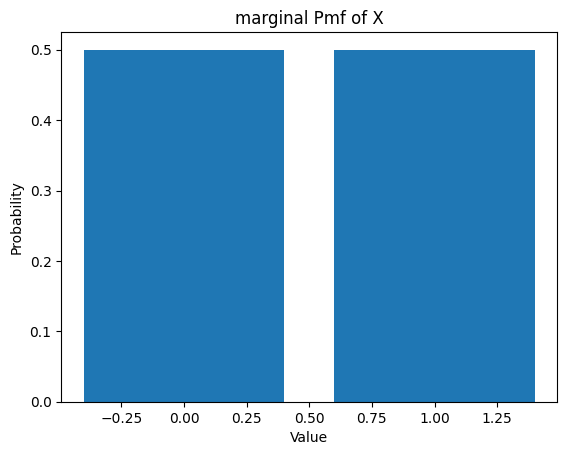

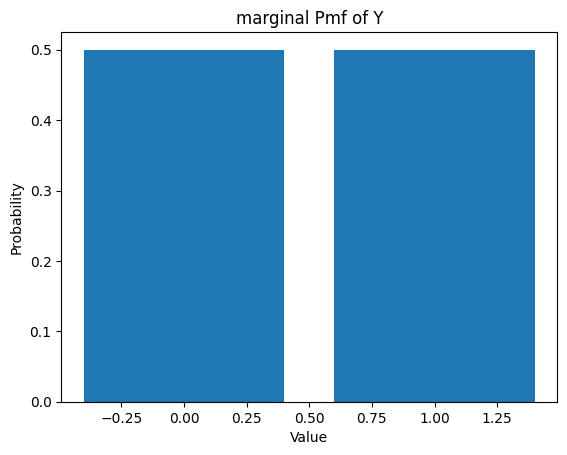

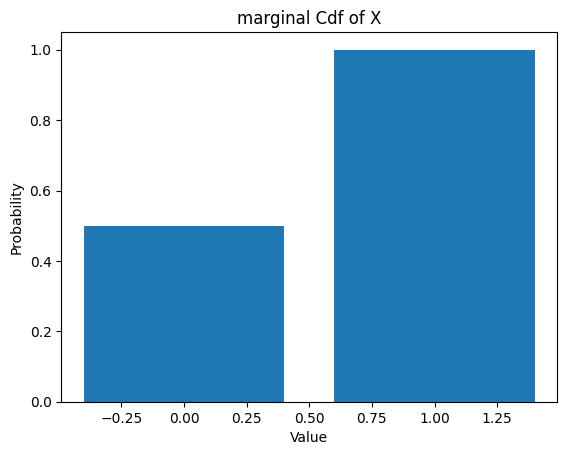

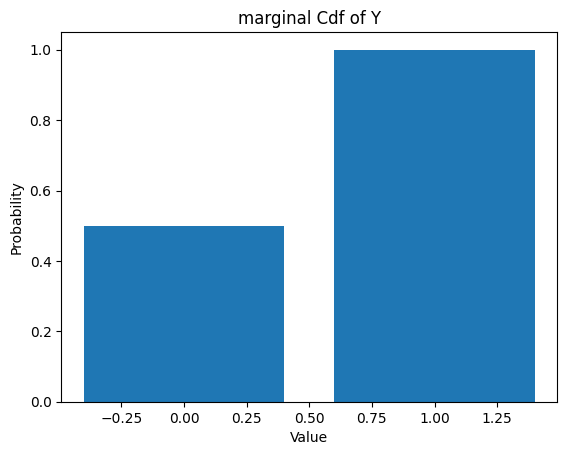

In [ ]:
#Marginal pmf plotting
plt.bar(np.arange(len_x),p_x)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Pmf of X')
plt.show()

plt.bar(np.arange(len_x),p_y)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Pmf of Y')
plt.show()

plt.bar(np.arange(len_x),np.cumsum(p_x))
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Cdf of X')
plt.show()

plt.bar(np.arange(len_y),np.cumsum(p_y))
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Cdf of Y')
plt.show()


Q3. Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].


In [ ]:
pmf1 = np.sum(Jp, axis=0)
pmf2 = np.sum(Jp, axis=1)

# Calculate E[XY]
EXY = 0
for i in range(len(x_values)):
  for j in range(len(y_values)):
    EXY += p_x[i] * p_x[j] * Jp[i][j]

# Calculate E[X] and E[Y]
EX = 0
EY = 0
for i in range(len(x_values)):
  for j in range(len(y_values)):
    EX += p_x[i] *Jp[i][j]
    EY += p_y[j] * Jp[i][j]

# Calculating the values of X1 and Y1
X1_values = [x - EX for x in pmf1]
Y1_values = [y - EY for y in pmf2]

# Calculating E[X1Y1]
EX1Y1=0
for i in range(len(X1_values)):
  for j in range(len(Y1_values)):
    EX1Y1 += X1_values[i] * Y1_values[j] * Jp[i][j]

# Printing the results
print("E[XY]:", EXY)
print("E[X1Y1]:", EX1Y1)

NameError: name 'np' is not defined